# Machine_Learning_Workshop Class_Work

---



## Sine and taylor series function

Taylor expansion at n=1 0
Taylor expansion at n=3 x
Taylor expansion at n=5 -x**3/6 + x
Taylor expansion at n=7 x**5/120 - x**3/6 + x
Taylor expansion at n=9 -x**7/5040 + x**5/120 - x**3/6 + x


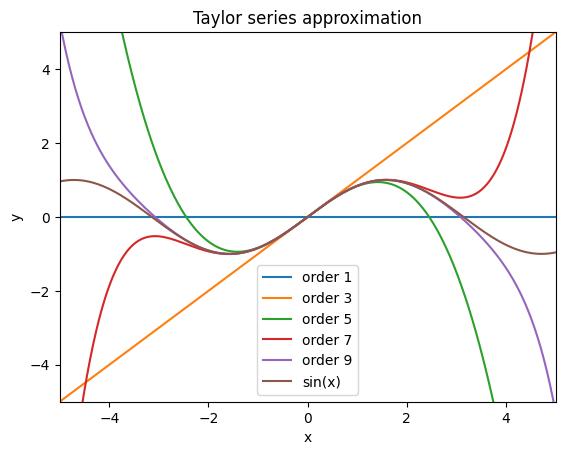

In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = sy.Symbol('x')
f = sy.sin(x)

# Calculate Taylor series approximation
def taylor(function, x0, n):
    """
    Calculate the Taylor series approximation of a function at a given point.

    Parameters:
    - function: the function to approximate
    - x0: the point to expand around
    - n: the order of the approximation

    Returns:
    - The Taylor series approximation of the function
    """
    series = function.series(x, x0, n).removeO()
    return series

# Plot results
def plot():
    x_lims = [-5, 5]
    x_vals = np.linspace(x_lims[0], x_lims[1], 800)
    y_vals = np.zeros_like(x_vals)

    plt.figure()

    # Approximate up until order 10 using steps of 2
    for j in range(1, 10, 2):
        func = taylor(f, 0, j)
        print('Taylor expansion at n=' + str(j), func)

        for i, x_val in enumerate(x_vals):
            y_vals[i] = func.subs(x, x_val)

        plt.plot(x_vals, y_vals, label='order ' + str(j))

    # Plot the actual function
    plt.plot(x_vals, np.sin(x_vals), label='sin(x)')

    plt.xlim(x_lims)
    plt.ylim([-5, 5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(False)
    plt.title('Taylor series approximation')
    plt.show()

plot()

# ML_HW

#  The import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-2-d07be8f6a1e8>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Load Iris Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [ ]:
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

##  Standardize the Data

#### snce PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values


In [ ]:
y = df.loc[:,['target']].values


In [ ]:
x = StandardScaler().fit_transform(x)


In [ ]:
pd.DataFrame(data = x, columns = features).head()


sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977

# PCA Projection to 2D

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)


principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767

In [ ]:
df[['target']].head()


target
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)


principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

#  Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

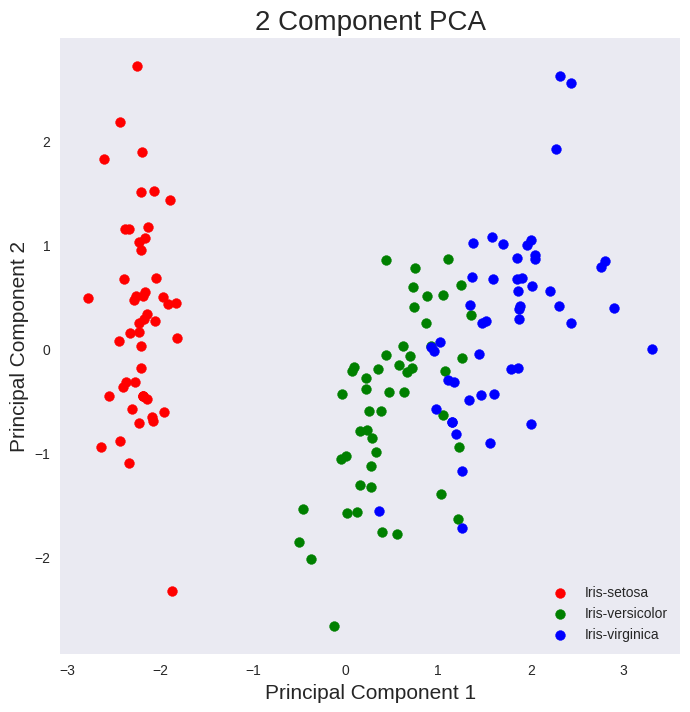

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


##  The three classes appear to be well separated!

### iris-virginica and iris-versicolor could be better separated, but still good! Explained Variance. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

# What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (most common application in my opinion). We will see this in the MNIST dataset.

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data’s information. This can be a reasonable tradeoff.
What are the limitations of PCA?
    PCA is not scale invariant. check: we need to scale our data first.
    The directions with largest variance are assumed to be of the most interest
    Only considers orthogonal transformations (rotations) of the original variables
    PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
    If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.


# CLASS WORK

In [ ]:
import pandas as pd

data= {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
        }
df = pd.DataFrame(data)
df


year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8          943
15  2016      9           1.75                6.1          958
16  2016      8           1.75                6.2          971
17  2016      7           1.75                6.1          949
18  2016      6           1.75                6.1          884
19  2016      5           1.75                6.1          866
20  2016      4           1.75                5.9          876
21  2016      3           1.75                6.2          822
22  2016      2           1.75                6.2          704
23  2016      1           1.75                6.1          719

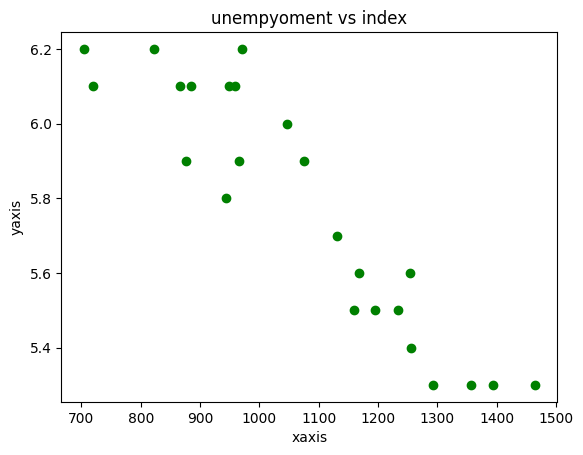

In [ ]:
plt.scatter( data['index_price'], data['unemployment_rate'],   color='green')
plt.title("unempyoment vs index")
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.show()


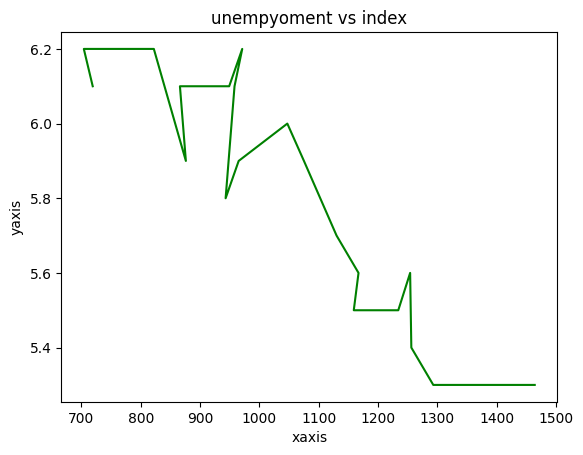

In [ ]:
plt.plot( data['index_price'], data['unemployment_rate'],    color='green')
plt.title("unempyoment vs index")
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.show()


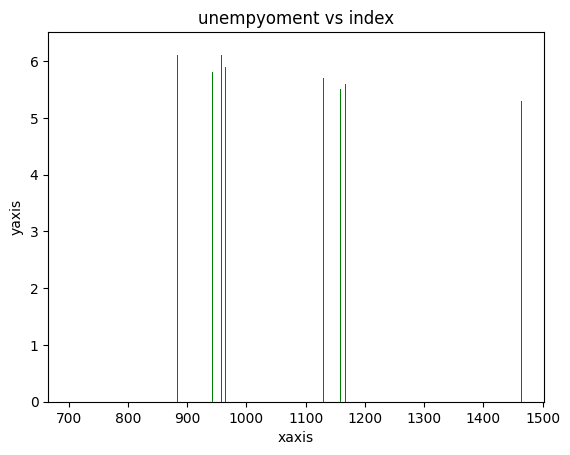

In [ ]:
plt.bar( data['index_price'], data['unemployment_rate'],   color='green')
plt.title("unempyoment vs index")
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.show()


# ML HW_For_Linear_regression

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data = {'Y': [500,456,528,150,350,286,156, 555, 963,785],
        'X1': [30,58,70,25,82,75,56,92,78,45],
        'X2': [20,85,73,52,45,32,74,39,68,28],
        'X3': [60,45,27,90,75,31,25,38,49,72],

        }
df = pd.DataFrame(data)
df


Y  X1  X2  X3
0  500  30  20  60
1  456  58  85  45
2  528  70  73  27
3  150  25  52  90
4  350  82  45  75
5  286  75  32  31
6  156  56  74  25
7  555  92  39  38
8  963  78  68  49
9  785  45  28  72

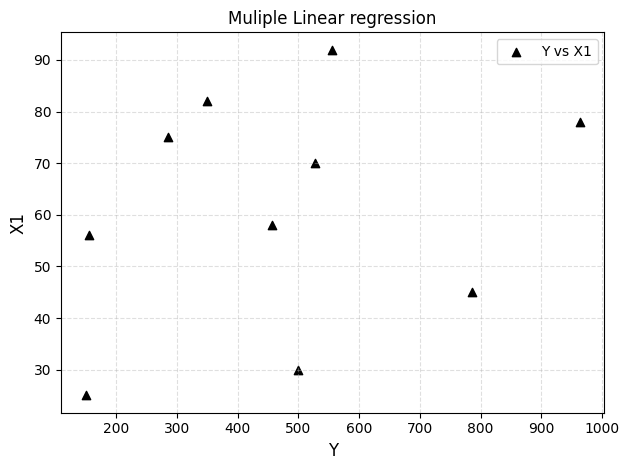

In [ ]:
plt.scatter(data['Y'], data['X1'], color='black', marker="^")

plt.title("Muliple Linear regression")
plt.xlabel('Y', fontsize=12)
plt.ylabel('X1', fontsize=12)
plt.legend(['Y vs X1'])
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

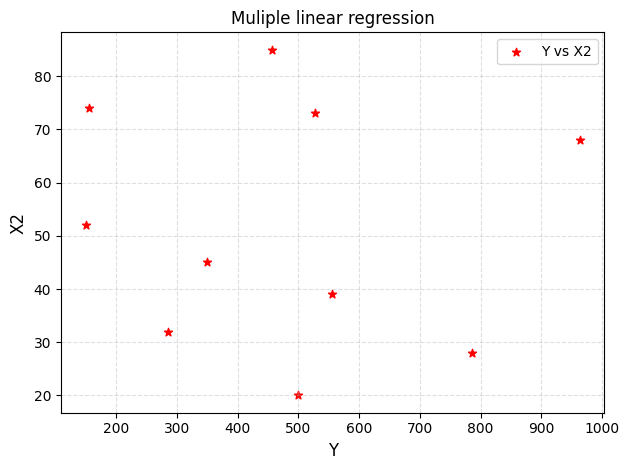

In [ ]:
plt.scatter(data['Y'], data['X2'], color='red', marker="*")

plt.title("Muliple linear regression")
plt.xlabel('Y', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend(['Y vs X2'])
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

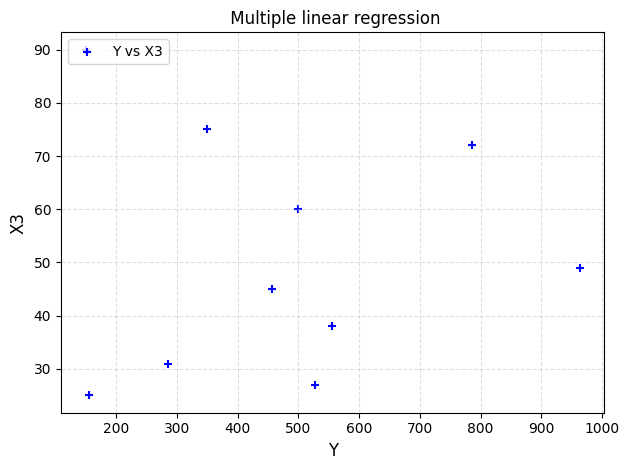

In [ ]:
plt.scatter(data['Y'], data['X3'], color='blue', marker="+")

plt.title(" Multiple linear regression")
plt.xlabel('Y', fontsize=12)
plt.ylabel('X3', fontsize=12)
plt.legend(['Y vs X3'], loc= 2)
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

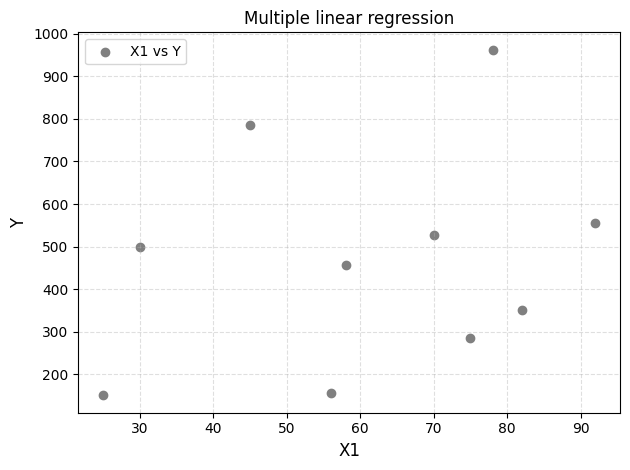

In [ ]:
plt.scatter(data['X1'], data['Y'], color='gray', marker="o")

plt.title("Multiple linear regression")
plt.xlabel('X1', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(['X1 vs Y'], loc= 2)
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

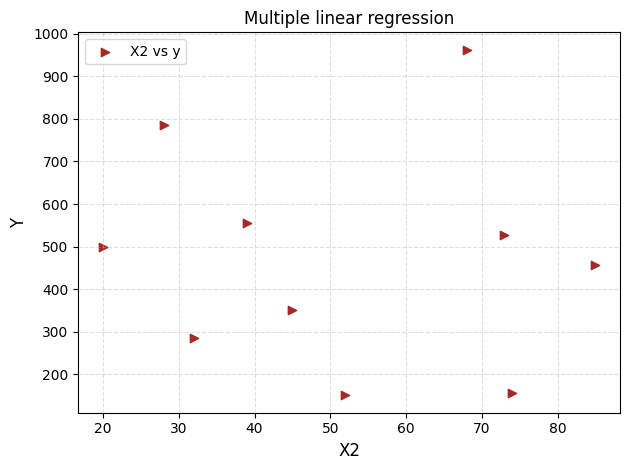

In [ ]:
plt.scatter(data['X2'], data['Y'], color='brown', marker=">")

plt.title("Multiple linear regression")
plt.xlabel('X2', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(['X2 vs y'], loc=2)
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

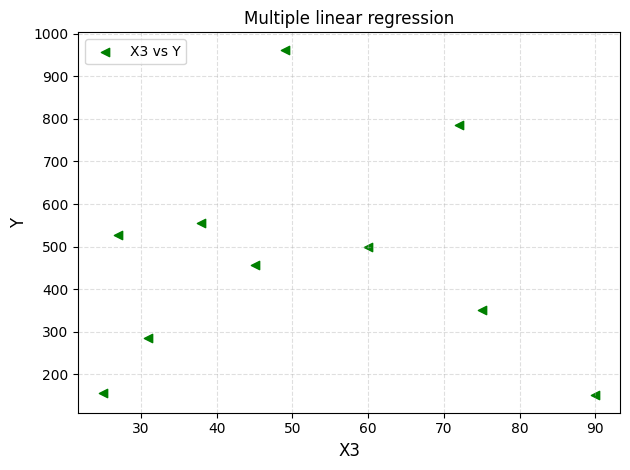

In [ ]:
plt.scatter(data['X3'], data['Y'], color='green', marker="<")

plt.title("Multiple linear regression")
plt.xlabel('X3', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(['X3 vs Y'], loc=2)
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines
plt.xticks(fontsize=10)  # Increase x-axis tick font size
plt.yticks(fontsize=10)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust spacing between subplots

# Add annotations for data points
plt.show()

# Finding the Mean

In [ ]:
df.describe()

Y         X1         X2         X3
count   10.000000  10.000000  10.000000  10.000000
mean   472.900000  61.100000  51.600000  51.200000
std    258.870817  22.397669  22.326865  22.309938
min    150.000000  25.000000  20.000000  25.000000
25%    302.000000  47.750000  33.750000  32.750000
50%    478.000000  64.000000  48.500000  47.000000
75%    548.250000  77.250000  71.750000  69.000000
max    963.000000  92.000000  85.000000  90.000000

# Linear regression

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:

data = {'Y': [500,456,528,150,350,286,156, 555, 963,785],
        'X1': [30,58,70,25,82,75,56,92,78,45],
        'X2': [20,85,73,52,45,32,74,39,68,28],
        'X3': [60,45,27,90,75,31,25,38,49,72],

        }
df = pd.DataFrame(data)


In [ ]:
x = df[['X1','X2', 'X3']]
y = df['Y']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)
intercept = regr.intercept_
coefficients = regr.coef_
equation = f'Y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {coef} * x{i+1}'

print(equation)

Intercept: 
 175.5928793338163
Coefficients: 
 [ 4.05684081 -0.80032299  1.77208621]
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                 -0.356
Method:                 Least Squares   F-statistic:                    0.2120
Date:                Fri, 24 Nov 2023   Prob (F-statistic):              0.885
Time:                        07:26:48   Log-Likelihood:                -68.722
No. Observations:                  10   AIC:                             145.4
Df Residuals:                       6   BIC:                             146.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Practical work on Car price data analysis

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



In [ ]:
files.upload()

Saving auto_clean.csv to auto_clean (1).csv


{'auto_clean (1).csv': b'symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas\n3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1\n3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1\n1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,0.9097222222222222,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1\n2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,0.9194444444444444,54.3,2337,o

In [ ]:
df = pd.read_csv('auto_clean.csv', index_col=0)#Data Frame
df


normalized-losses         make aspiration num-of-doors  \
symboling                                                           
 3                       122  alfa-romero        std          two   
 3                       122  alfa-romero        std          two   
 1                       122  alfa-romero        std          two   
 2                       164         audi        std         four   
 2                       164         audi        std         four   
...                      ...          ...        ...          ...   
-1                        95        volvo        std         four   
-1                        95        volvo      turbo         four   
-1                        95        volvo        std         four   
-1                        95        volvo      turbo         four   
-1                        95        volvo      turbo         four   

            body-style drive-wheels engine-location  wheel-base    length  \
symboling                                                                   
 3         convertible          rwd           front        88.6  0.811148   
 3         convertible          rwd           front        88.6  0.811148   
 1           hatchback          rwd           front        94.5  0.822681   
 2               sedan          fwd           front        99.8  0.848630   
 2               sedan          4wd           front        99.4  0.848630   
...                ...          ...             ...         ...       ...   
-1               sedan          rwd           front       109.1  0.907256   
-1               sedan          rwd           front       109.1  0.907256   
-1               sedan          rwd           front       109.1  0.907256   
-1               sedan          rwd           front       109.1  0.907256   
-1               sedan          rwd           front       109.1  0.907256   

              width  ...  compression-ratio  horsepower peak-rpm city-mpg  \
symboling            ...                                                    
 3         0.890278  ...                9.0       111.0   5000.0       21   
 3         0.890278  ...                9.0       111.0   5000.0       21   
 1         0.909722  ...                9.0       154.0   5000.0       19   
 2         0.919444  ...               10.0       102.0   5500.0       24   
 2         0.922222  ...                8.0       115.0   5500.0       18   
...             ...  ...                ...         ...      ...      ...   
-1         0.956944  ...                9.5       114.0   5400.0       23   
-1         0.955556  ...                8.7       160.0   5300.0       19   
-1         0.956944  ...                8.8       134.0   5500.0       18   
-1         0.956944  ...               23.0       106.0   4800.0       26   
-1         0.956944  ...                9.5       114.0   5400.0       19   

           highway-mpg    price  city-L/100km  horsepower-binned  diesel  gas  
symboling                                                                      
 3                  27  13495.0     11.190476             Medium       0    1  
 3                  27  16500.0     11.190476             Medium       0    1  
 1                  26  16500.0     12.368421             Medium       0    1  
 2                  30  13950.0      9.791667             Medium       0    1  
 2                  22  17450.0     13.055556             Medium       0    1  
...                ...      ...           ...                ...     ...  ...  
-1                  28  16845.0     10.217391             Medium       0    1  
-1                  25  19045.0     12.368421               High       0    1  
-1                  23  21485.0     13.055556             Medium       0    1  
-1                  27  22470.0      9.038462             Medium       1    0  
-1                  25  22625.0     12.368421             Medium       0    1  

[201 rows x 28 columns]

In [ ]:
df.head(5)

normalized-losses         make aspiration num-of-doors  \
symboling                                                           
3                        122  alfa-romero        std          two   
3                        122  alfa-romero        std          two   
1                        122  alfa-romero        std          two   
2                        164         audi        std         four   
2                        164         audi        std         four   

            body-style drive-wheels engine-location  wheel-base    length  \
symboling                                                                   
3          convertible          rwd           front        88.6  0.811148   
3          convertible          rwd           front        88.6  0.811148   
1            hatchback          rwd           front        94.5  0.822681   
2                sedan          fwd           front        99.8  0.848630   
2                sedan          4wd           front        99.4  0.848630   

              width  ...  compression-ratio  horsepower peak-rpm city-mpg  \
symboling            ...                                                    
3          0.890278  ...                9.0       111.0   5000.0       21   
3          0.890278  ...                9.0       111.0   5000.0       21   
1          0.909722  ...                9.0       154.0   5000.0       19   
2          0.919444  ...               10.0       102.0   5500.0       24   
2          0.922222  ...                8.0       115.0   5500.0       18   

           highway-mpg    price  city-L/100km  horsepower-binned  diesel  gas  
symboling                                                                      
3                   27  13495.0     11.190476             Medium       0    1  
3                   27  16500.0     11.190476             Medium       0    1  
1                   26  16500.0     12.368421             Medium       0    1  
2                   30  13950.0      9.791667             Medium       0    1  
2                   22  17450.0     13.055556             Medium       0    1  

[5 rows x 28 columns]

In [ ]:

makers = df['make'].value_counts().index


In [ ]:


model_count = df['make'].value_counts().values



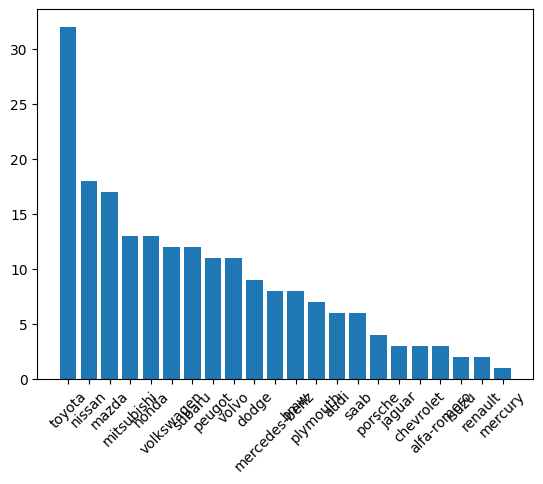

In [ ]:
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()


In [ ]:

df.corr()


<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


normalized-losses  wheel-base    length     width  \
normalized-losses           1.000000   -0.056661  0.019424  0.086802   
wheel-base                 -0.056661    1.000000  0.876024  0.814507   
length                      0.019424    0.876024  1.000000  0.857170   
width                       0.086802    0.814507  0.857170  1.000000   
height                     -0.373737    0.590742  0.492063  0.306002   
curb-weight                 0.099404    0.782097  0.880665  0.866201   
engine-size                 0.112360    0.572027  0.685025  0.729436   
bore                       -0.029862    0.493244  0.608971  0.544885   
stroke                      0.055563    0.158502  0.124139  0.188829   
compression-ratio          -0.114713    0.250313  0.159733  0.189867   
horsepower                  0.217299    0.371147  0.579821  0.615077   
peak-rpm                    0.239543   -0.360305 -0.285970 -0.245800   
city-mpg                   -0.225016   -0.470606 -0.665192 -0.633531   
highway-mpg                -0.181877   -0.543304 -0.698142 -0.680635   
price                       0.133999    0.584642  0.690628  0.751265   
city-L/100km                0.238567    0.476153  0.657373  0.673363   
diesel                     -0.101546    0.307237  0.211187  0.244356   
gas                         0.101546   -0.307237 -0.211187 -0.244356   

                     height  curb-weight  engine-size      bore    stroke  \
normalized-losses -0.373737     0.099404     0.112360 -0.029862  0.055563   
wheel-base         0.590742     0.782097     0.572027  0.493244  0.158502   
length             0.492063     0.880665     0.685025  0.608971  0.124139   
width              0.306002     0.866201     0.729436  0.544885  0.188829   
height             1.000000     0.307581     0.074694  0.180449 -0.062704   
curb-weight        0.307581     1.000000     0.849072  0.644060  0.167562   
engine-size        0.074694     0.849072     1.000000  0.572609  0.209523   
bore               0.180449     0.644060     0.572609  1.000000 -0.055390   
stroke            -0.062704     0.167562     0.209523 -0.055390  1.000000   
compression-ratio  0.259737     0.156433     0.028889  0.001263  0.187923   
horsepower        -0.087027     0.757976     0.822676  0.566936  0.098462   
peak-rpm          -0.309974    -0.279361    -0.256733 -0.267392 -0.065713   
city-mpg          -0.049800    -0.749543    -0.650546 -0.582027 -0.034696   
highway-mpg       -0.104812    -0.794889    -0.679571 -0.591309 -0.035201   
price              0.135486     0.834415     0.872335  0.543155  0.082310   
city-L/100km       0.003811     0.785353     0.745059  0.554610  0.037300   
diesel             0.281578     0.221046     0.070779  0.054458  0.241303   
gas               -0.281578    -0.221046    -0.070779 -0.054458 -0.241303   

                   compression-ratio  horsepower  peak-rpm  city-mpg  \
normalized-losses          -0.114713    0.217299  0.239543 -0.225016   
wheel-base                  0.250313    0.371147 -0.360305 -0.470606   
length                      0.159733    0.579821 -0.285970 -0.665192   
width                       0.189867    0.615077 -0.245800 -0.633531   
height                      0.259737   -0.087027 -0.309974 -0.049800   
curb-weight                 0.156433    0.757976 -0.279361 -0.749543   
engine-size                 0.028889    0.822676 -0.256733 -0.650546   
bore                        0.001263    0.566936 -0.267392 -0.582027   
stroke                      0.187923    0.098462 -0.065713 -0.034696   
compression-ratio           1.000000   -0.214514 -0.435780  0.331425   
horsepower                 -0.214514    1.000000  0.107885 -0.822214   
peak-rpm                   -0.435780    0.107885  1.000000 -0.115413   
city-mpg                    0.331425   -0.822214 -0.115413  1.000000   
highway-mpg                 0.268465   -0.804575 -0.058598  0.972044   
price                       0.071107    0.809575 -0.101616 -0.686571   
city-L/100km               -0.2993

<Axes: xlabel='width', ylabel='price'>

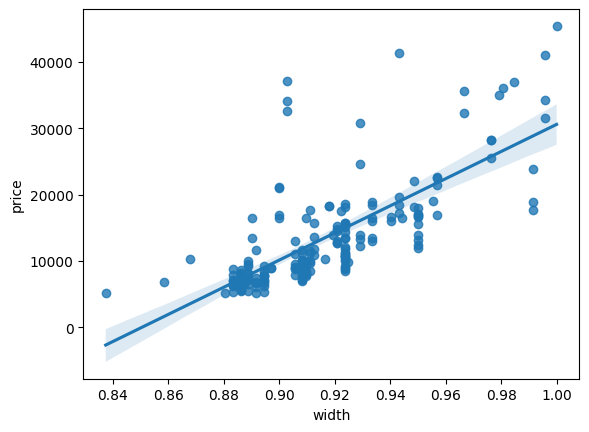

In [ ]:
sns.regplot(x='width',y='price',data=df)

<Axes: xlabel='height', ylabel='price'>

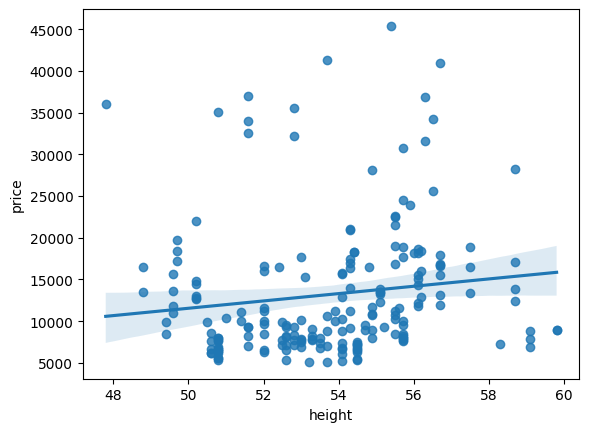

In [ ]:


sns.regplot(x='height',y='price',data=df)



<Axes: xlabel='bore', ylabel='price'>

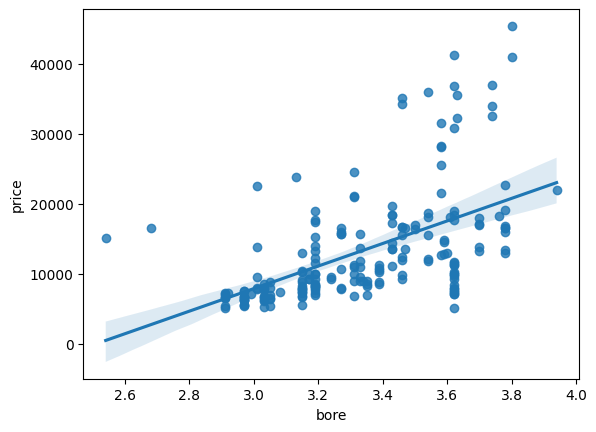

In [ ]:


sns.regplot(x='bore',y='price',data=df)



<Axes: xlabel='horsepower', ylabel='price'>

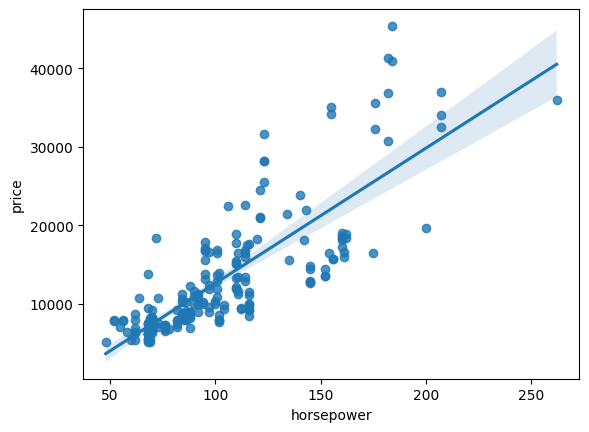

In [ ]:
sns.regplot(x='horsepower',y='price',data=df)

<Axes: xlabel='city-mpg', ylabel='price'>

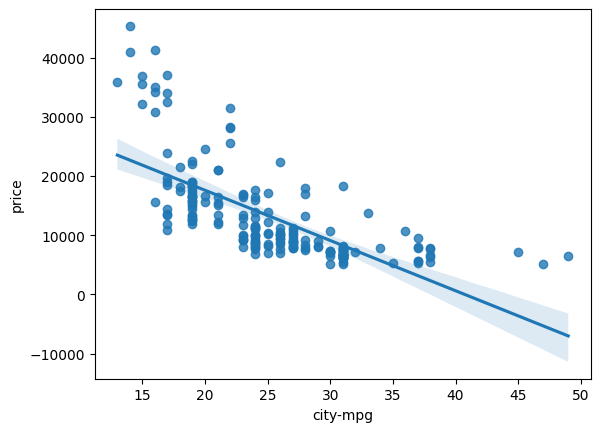

In [ ]:
sns.regplot(x='city-mpg',y='price',data=df)

<Axes: xlabel='highway-mpg', ylabel='price'>

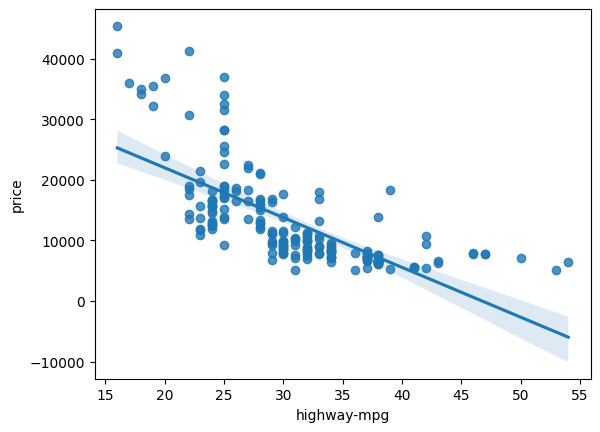

In [ ]:


sns.regplot(x='highway-mpg',y='price',data=df)



In [ ]:


df[['width','horsepower','curb-weight','city-mpg','highway-mpg','wheel-base','engine-size','price']].corr()



width  horsepower  curb-weight  city-mpg  highway-mpg  \
width        1.000000    0.615077     0.866201 -0.633531    -0.680635   
horsepower   0.615077    1.000000     0.757976 -0.822214    -0.804575   
curb-weight  0.866201    0.757976     1.000000 -0.749543    -0.794889   
city-mpg    -0.633531   -0.822214    -0.749543  1.000000     0.972044   
highway-mpg -0.680635   -0.804575    -0.794889  0.972044     1.000000   
wheel-base   0.814507    0.371147     0.782097 -0.470606    -0.543304   
engine-size  0.729436    0.822676     0.849072 -0.650546    -0.679571   
price        0.751265    0.809575     0.834415 -0.686571    -0.704692   

             wheel-base  engine-size     price  
width          0.814507     0.729436  0.751265  
horsepower     0.371147     0.822676  0.809575  
curb-weight    0.782097     0.849072  0.834415  
city-mpg      -0.470606    -0.650546 -0.686571  
highway-mpg   -0.543304    -0.679571 -0.704692  
wheel-base     1.000000     0.572027  0.584642  
engine-size    0.572027     1.000000  0.872335  
price          0.584642     0.872335  1.000000

# Diabetes_Prediction_final

In [ ]:
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
df = pd.read_csv('diabetes.csv', index_col=0)#Data Frame
df


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   
...              ...            ...            ...      ...   ...   
10               101             76             48      180  32.9   
2                122             70             27        0  36.8   
5                121             72             23      112  26.2   
1                126             60              0        0  30.1   
1                 93             70             31        0  30.4   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1  
...                               ...  ...      ...  
10                              0.171   63        0  
2                               0.340   27        0  
5                               0.245   30        0  
1                               0.349   47        1  
1                               0.315   23        0  

[768 rows x 8 columns]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ML

Missing Values:
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Summary Statistics:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      3

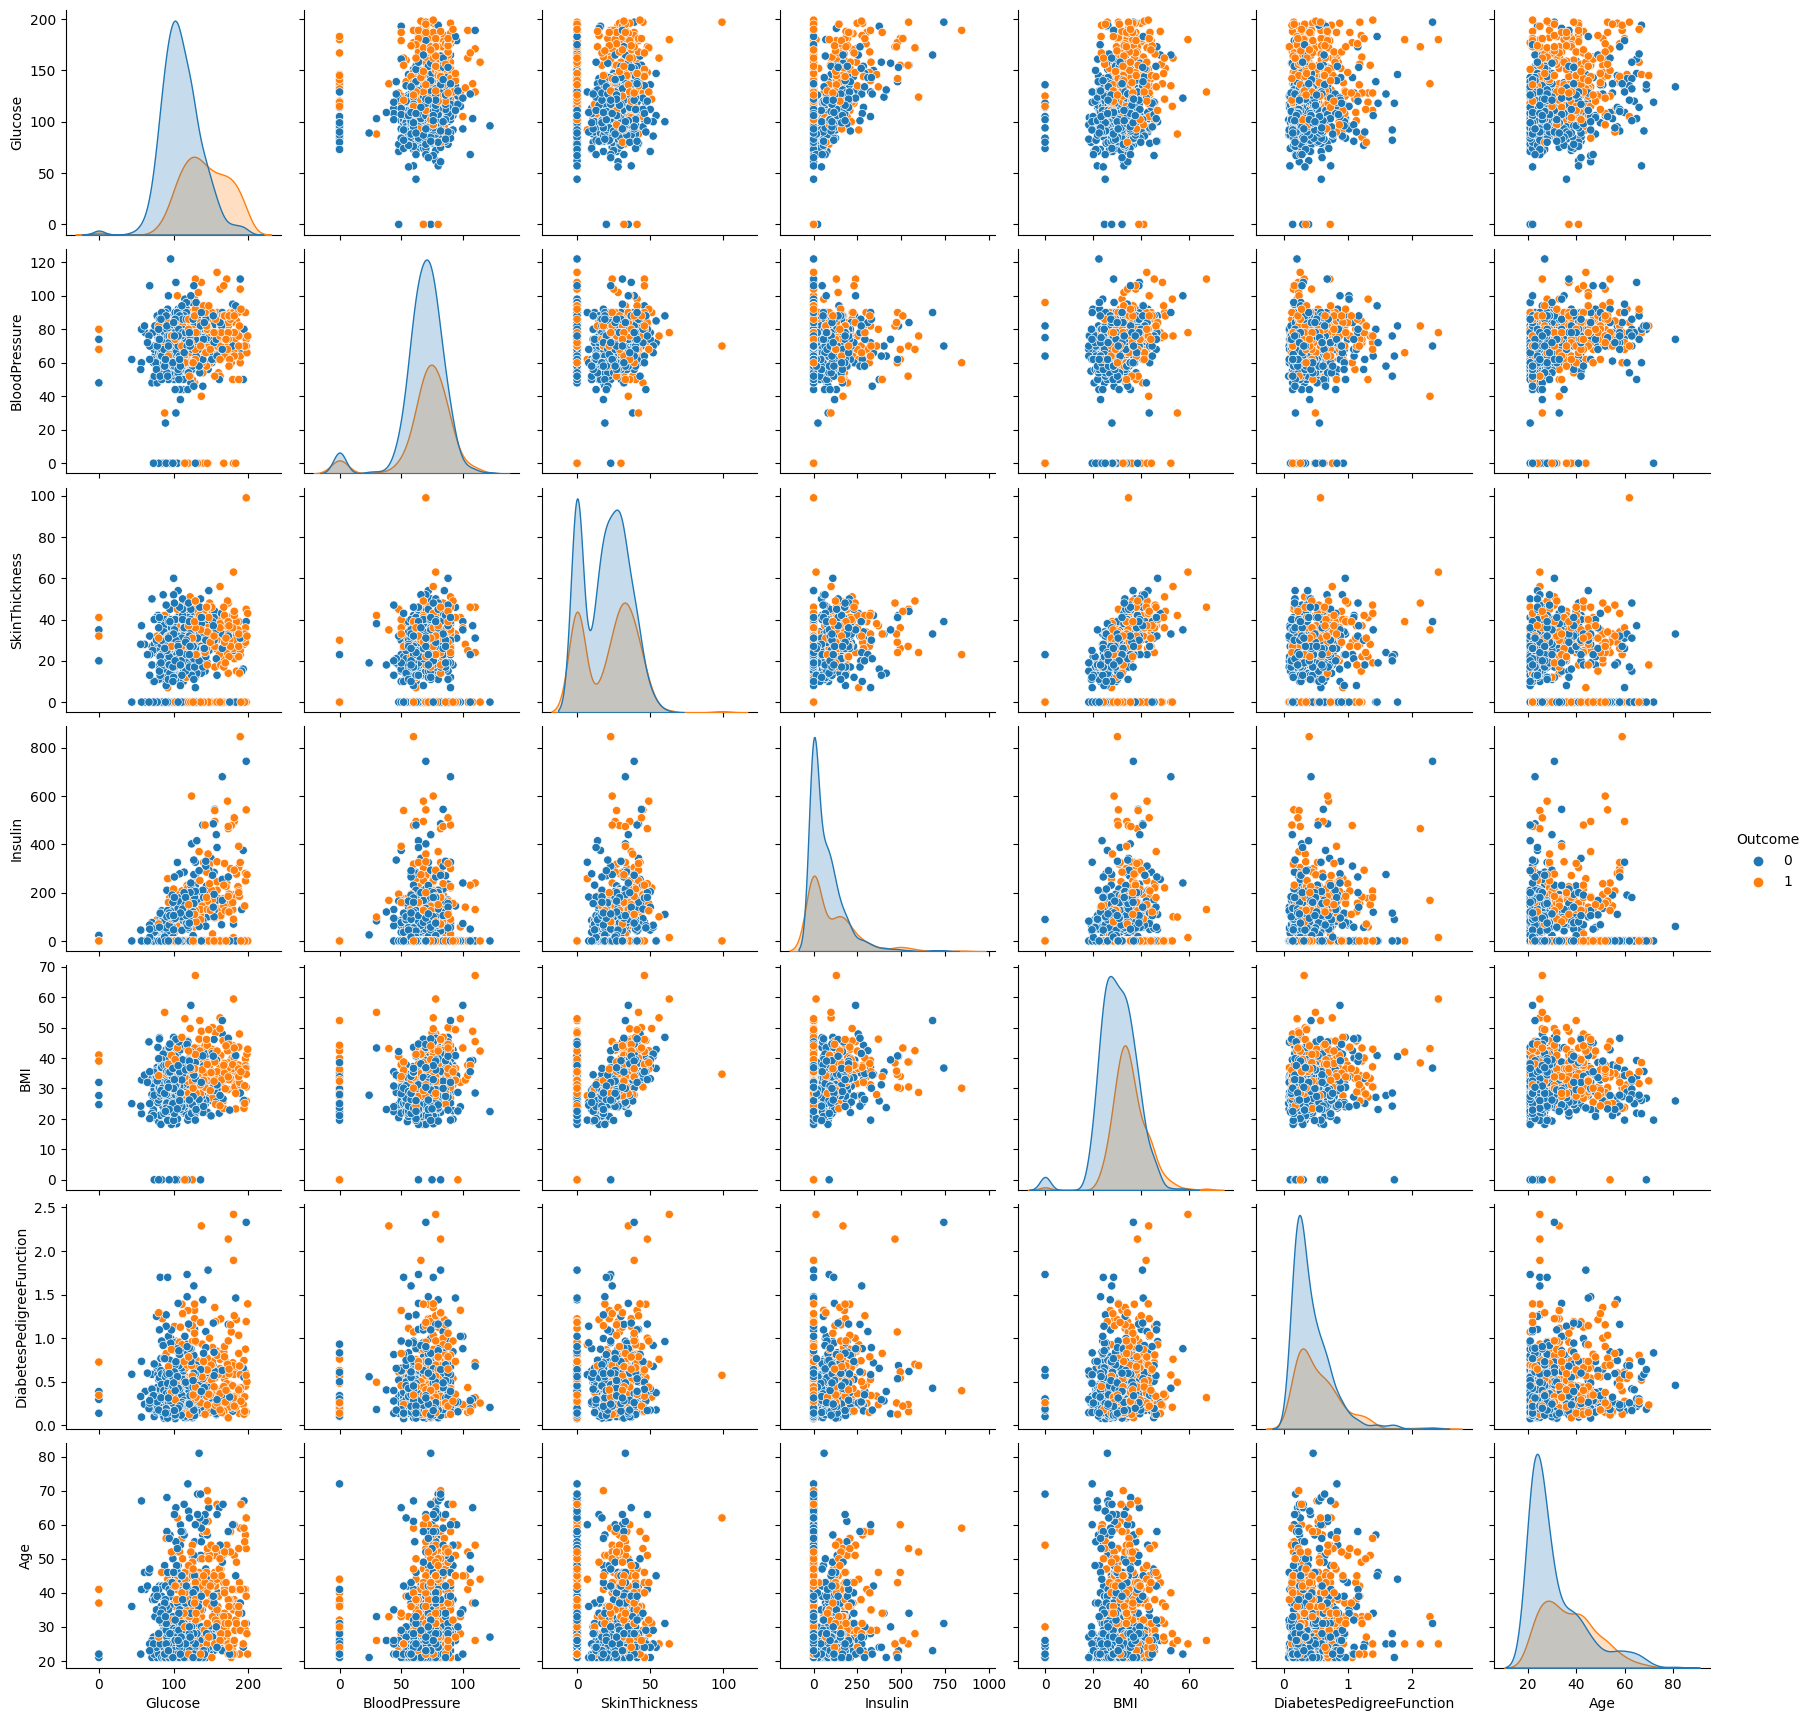

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



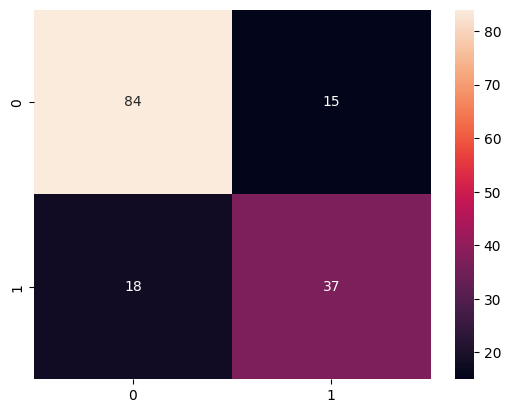

In [ ]:

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (if any)
# For example, fill missing values with the mean of the column
mean_fill = df.mean()
df.fillna(mean_fill, inplace=True)

# Check for Duplicate Rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Handle duplicate rows (if any)
# For example, drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 4: Data Analysis

# Summary Statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Class Distribution (for binary classification problems)
class_distribution = df['Outcome'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

# Step 5: Data Visualization
sns.pairplot(df, hue='Outcome')
plt.show()

# Step 6: Support Vector Machine (SVM) Modeling

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [ ]:
X, y=  make_blobs(n_samples=1000, centers=2, random_state=1)

In [ ]:
print(X.shape, y.shape)

(1000, 2) (1000,)


# Summarize observations by class label

In [ ]:
counter= Counter(y)

In [ ]:
print(counter)

Counter({0: 500, 1: 500})


# Summarize 1st few example

In [ ]:
for i in range(20):
  print(X[i], y[i])

[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-11.57178593  -3.85275513] 1
[-11.42257341  -4.85679127] 1
[-10.44518578  -3.76476563] 1
[-10.44603561  -3.26065964] 1
[-0.61947075  3.48804983] 0
[-10.91115591  -4.5772537 ] 1
[-11.6173582   -1.94820802] 1
[-11.28684254  -3.8435656 ] 1
[-2.33022219  4.78405366] 0
[-1.0749133   4.73076411] 0
[-0.23594548  5.31048904] 0
[-11.39830695  -2.40373969] 1
[-8.50130719 -2.28261933] 1
[-0.49811992  4.37896048] 0
[-10.45601454  -5.50605442] 1
[-8.71791233 -4.40510449] 1


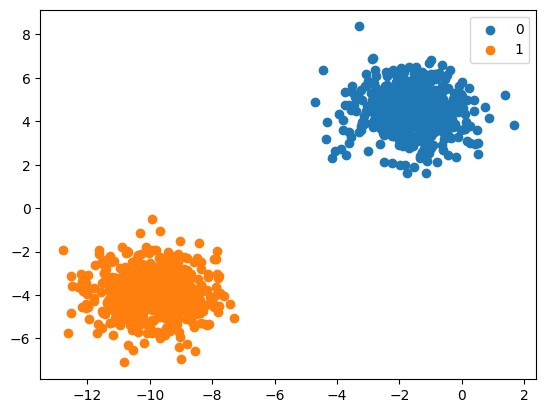

In [ ]:
for label, _ in counter.items():
  row_ix =where(y==label) [0]
  pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

# MUltiple

In [ ]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [ ]:
X, y=  make_blobs(n_samples=1000, centers=3, random_state=1)

In [ ]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [ ]:
counter= Counter(y)

In [ ]:
print(counter)

Counter({0: 334, 1: 333, 2: 333})


In [ ]:
for i in range(40):
  print(X[i], y[i])

[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-8.63895561 -8.05263469] 2
[-8.48974309 -9.05667083] 2
[-7.51235546 -7.96464519] 2
[-7.51320529 -7.46053919] 2
[-0.61947075  3.48804983] 0
[-10.91115591  -4.5772537 ] 1
[-8.68452788 -6.14808758] 2
[-8.35401222 -8.04344516] 2
[-2.33022219  4.78405366] 0
[-1.0749133   4.73076411] 0
[-0.23594548  5.31048904] 0
[-8.46547663 -6.60361925] 2
[-8.50130719 -2.28261933] 1
[-0.49811992  4.37896048] 0
[-7.52318422 -9.70593398] 2
[-5.78508201 -8.60498405] 2
[-8.49319064 -4.53177552] 1
[-10.28409742  -4.8242362 ] 1
[-9.21592534 -8.0169271 ] 2
[-0.81869835  4.30360265] 0
[-11.54210829  -5.49990959] 1
[-6.8996716  -7.17693181] 2
[-9.7320701  -4.21381461] 1
[-9.89365911 -3.42534513] 1
[-0.46064203  4.59164629] 0
[-10.19664995  -3.6513885 ] 1
[-8.17719647 -7.42208274] 2
[-6.84680369 -8.47104367] 2
[-10.56686116  -5.01514531] 1
[-9.42858791 -3.75603256] 1
[-1.99084308  4.79302901] 0
[-0.56056357

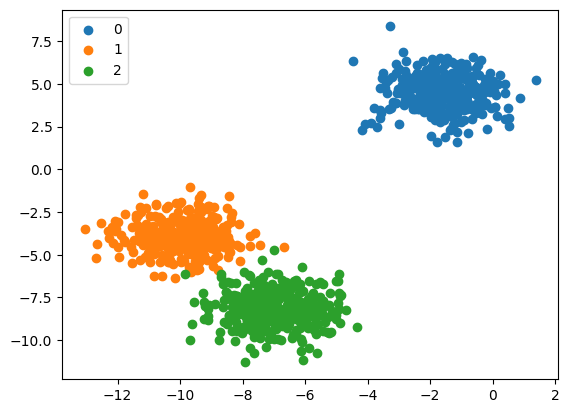

In [ ]:
for label, _ in counter.items():
  row_ix =where(y==label) [0]
  pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

# MUlti level classifications

In [ ]:
from sklearn.datasets import make_multilabel_classification

In [ ]:
from sklearn.datasets import make_blobs

# Corrected parameters for make_blobs
X, y = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=3, n_labels=2, random_state=1)

In [ ]:
print(X.shape, y.shape)

(1000, 2) (1000, 3)


In [ ]:
for i in range(10):
  print(X[i], y[i])

[18. 35.] [1 1 1]
[22. 33.] [1 1 1]
[26. 36.] [1 1 1]
[24. 28.] [1 1 0]
[23. 27.] [1 1 0]
[15. 31.] [0 1 0]
[20. 37.] [0 1 0]
[18. 31.] [1 1 1]
[29. 27.] [1 0 0]
[29. 28.] [1 1 0]


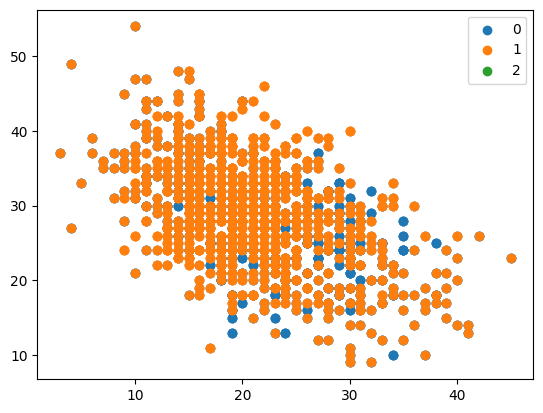

In [ ]:
for label, _ in counter.items():
  row_ix =where(y==label) [0]
  pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, weights=[0.99,0.01], random_state=1)

In [ ]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [ ]:
counter= Counter(y)
print(counter)

Counter({0: 983, 1: 17})


In [ ]:
for i in range(10):
  print(X[i], y[i])

[0.86924745 1.18613612] 0
[1.55110839 1.81032905] 0
[1.29361936 1.01094607] 0
[1.11988947 1.63251786] 0
[1.04235568 1.12152929] 0
[1.18114858 0.92397607] 0
[1.1365562  1.17652556] 0
[0.46291729 0.72924998] 0
[0.18315826 1.07141766] 0
[0.32411648 0.53515376] 0


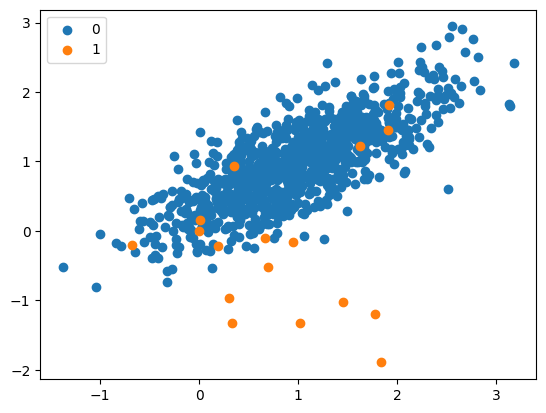

In [ ]:
for label, _ in counter.items():
  row_ix =where(y==label) [0]
  pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification


# Data

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

In [ ]:
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
for i in range(10):
  print(X[i], y[i])

[ 1.89149379 -0.39847585  1.63856893  0.01647165  1.51892395 -3.52651223
  1.80998823  0.58810926 -0.02542177 -0.52835426] 1
[ 1.86913773 -0.56336215  2.03411807  0.38669445 -0.09584042 -2.92724017
  0.73921674 -0.55633    -0.27340013  0.72129251] 0
[ 1.95259701 -2.83144572  0.19055535 -0.66388697  0.19159093 -1.8591214
 -0.10150205 -0.60957741 -2.07750191 -1.75469982] 1
[-0.67042514 -0.69082031  0.59354753 -0.06270367  2.37357676 -0.52106039
  0.42872513 -0.26851085  0.49226161 -1.34383965] 2
[-1.39890137 -0.71522959 -0.6774507   0.39153885 -0.45832391  2.17898372
 -1.88550244 -0.96686613 -0.42588787 -0.20782615] 0
[-2.94551044 -0.79851493 -1.92807818 -0.11749422  3.75941261  2.55924496
 -0.71375699  0.87323395  0.26641973 -3.52801155] 2
[-0.99746413 -1.35338763 -1.50586396 -1.73258977  3.66110299  0.44739896
  1.27005199  0.76439032  0.10839262 -3.74038228] 2
[-0.26028138  0.51739762  1.78389329  2.51998179  1.46572279 -1.50616812
 -0.68426509  0.64095725  0.27620903  0.3131776 ] 2
[

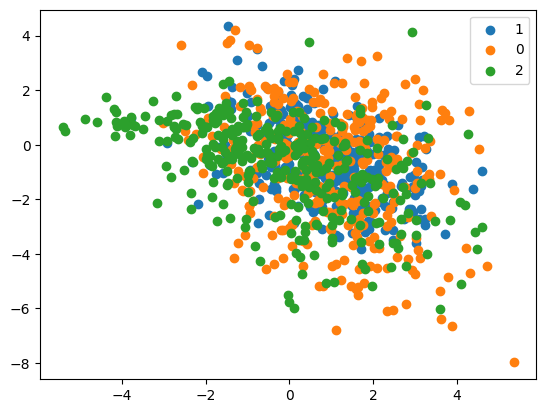

In [ ]:
for label, _ in counter.items():
  row_ix =where(y==label) [0]
  pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

# Define logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.681 (0.042)


# Today Task

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from  google.colab import files

In [ ]:
files.upload()

!ls

# OS Linux -> bash -> ls (from "list")


Saving CarPrice.csv to CarPrice.csv
'auto_clean (1).csv'   auto_clean.csv   CarPrice.csv   sample_data


In [ ]:
df = pd.read_csv('CarPrice.csv')
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [ ]:
plt.style.use('dark_background')

# Data Cleaning

In [ ]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Working on Mean

In [ ]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

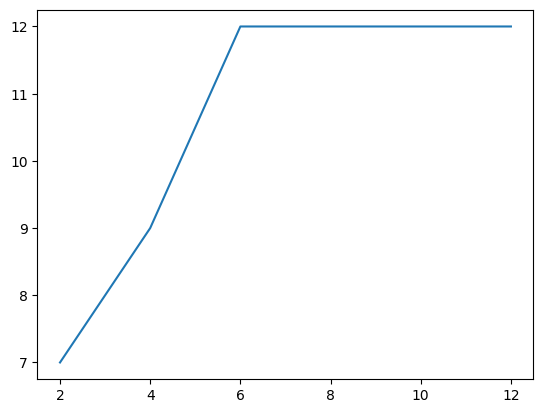

In [ ]:
import matplotlib.pyplot as plt

x = [ 2, 3, 4, 6, 12]
y = [7, 8, 9, 12, 12]
plt.plot(x, y)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs


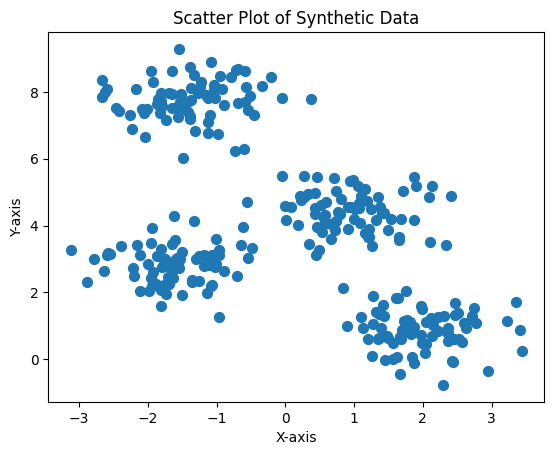

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


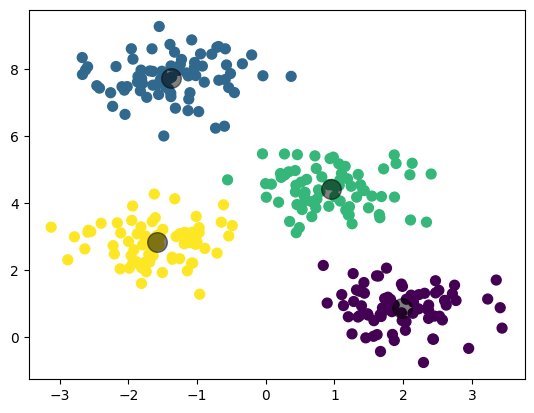

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



In [ ]:
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [ ]:
df = pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

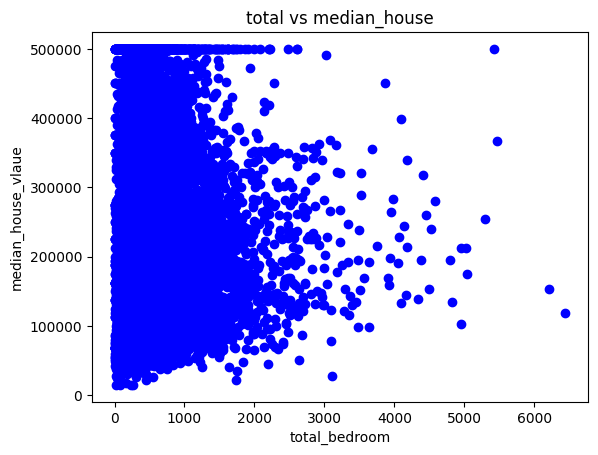

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df['total_bedrooms'], df['median_house_value'],   color='blue')
plt.title("total vs median_house")
plt.xlabel('total_bedroom')
plt.ylabel('median_house_vlaue')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


<Axes: xlabel='longitude', ylabel='latitude'>

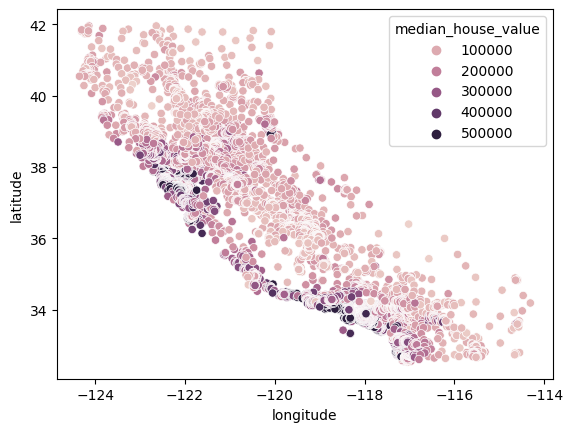

In [ ]:
sns.scatterplot(df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

# Supert Vector Machine

# Loading Breast Cancer

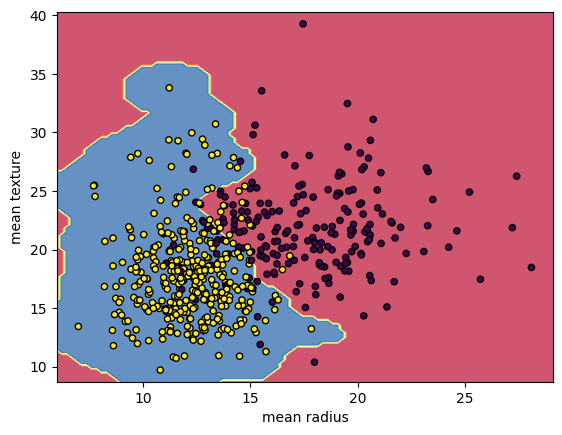

In [ ]:

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

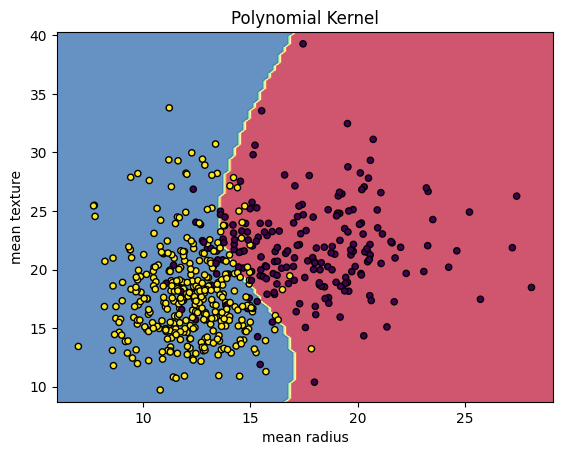

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

# Build the models
svm_poly = SVC(kernel="poly", degree=3, C=1.0)
svm_linear = SVC(kernel="linear", C=1.0)

# Train the models
svm_poly.fit(X, y)
svm_linear.fit(X, y)

# Plot Decision Boundaries
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#plt.subplot(1, 2, 1)
DecisionBoundaryDisplay.from_estimator(
    svm_poly,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")

plt.title("Polynomial Kernel")
plt.show()


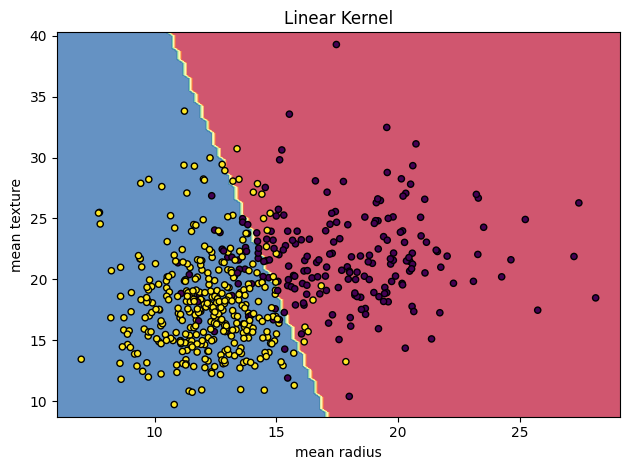

In [ ]:
DecisionBoundaryDisplay.from_estimator(
    svm_linear,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
plt.title("Linear Kernel")

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.tight_layout()
plt.show()


In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))

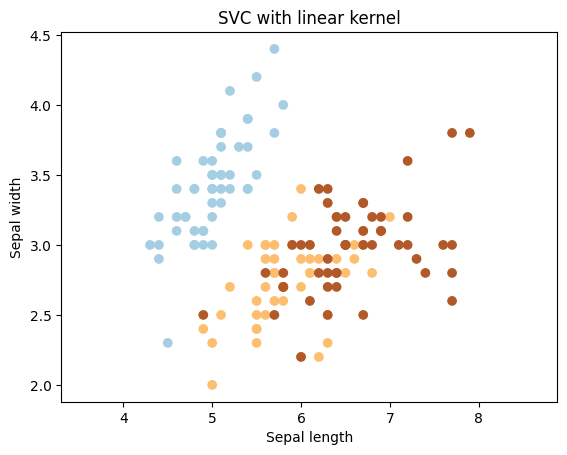

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Output the Plot
plt.show()

# Home Task

In [ ]:
iris = datasets.load_iris();

In [ ]:
X = iris.data

y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

In [ ]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
svc = SVC(kernel="rbf",  random_state=1, gamma=50.0, C=10.0)

In [ ]:
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.733


# Home Task plot the Iris data

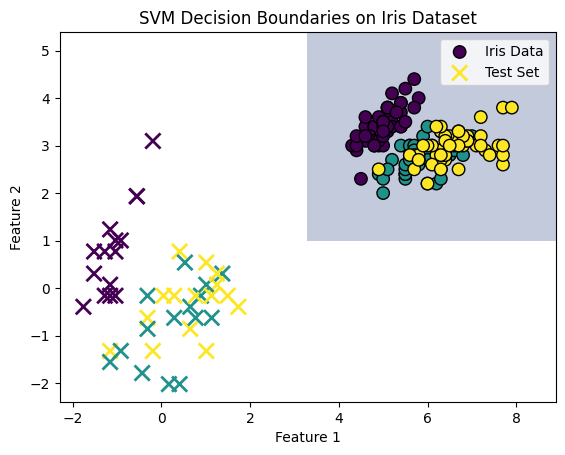

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Fit SVM model
svc = SVC(kernel="rbf", random_state=1, gamma=50.0, C=10.0)
svc.fit(X_train_std, y_train)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80, label='Iris Data')
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap='viridis', marker='x', s=120, linewidth=2, label='Test Set')
plt.title('SVM Decision Boundaries on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# k Means

## K-Means Clustering


K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

## 1. Introduction to K-Means Clustering


Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

**K-Means clustering** is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.


## 2. K-Means Clustering intuition


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.


**Centroid** - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.
K-Means clustering works as follows:-
The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-


**1. Data assignment step**


Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.



**2. Centroid update step**


In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.


The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached.
This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.



## 3. Choosing the value of K


The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the **elbow method** which is described below.


## 4. The elbow method


The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

If K increases, average distortion will decrease.  Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

## 5. The problem statement


 We will  K-Means clustering to find intrinsic groups within this dataset that display the same `status_type` behaviour. The `status_type` behaviour variable consists of posts of a different nature (video, photos, statuses and links).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
files.upload()

df = pd.read_csv('Live_20210128.csv', index_col=0)
df

Saving Live_20210128.csv to Live_20210128 (3).csv


status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   
...               ...              ...            ...           ...   
7046            photo   9/24/2016 2:58             89             0   
7047            photo  9/23/2016 11:19             16             0   
7048            photo  9/21/2016 23:03              2             0   
7049            photo   9/20/2016 0:43            351            12   
7050            photo  9/10/2016 10:30             17             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   
...               ...        ...        ...       ...        ...       ...   
7046                0         89          0         0          0         0   
7047                0         14          1         0          1         0   
7048                0          1          1         0          0         0   
7049               22        349          2         0          0         0   
7050                0         17          0         0          0         0   

           num_angrys  Column1  Column2  Column3  Column4  
status_id                                                  
1                   0      NaN      NaN      NaN      NaN  
2                   0      NaN      NaN      NaN      NaN  
3                   0      NaN      NaN      NaN      NaN  
4                   0      NaN      NaN      NaN      NaN  
5                   0      NaN      NaN      NaN      NaN  
...               ...      ...      ...      ...      ...  
7046                0      NaN      NaN      NaN      NaN  
7047                0      NaN      NaN      NaN      NaN  
7048                0      NaN      NaN      NaN      NaN  
7049                0      NaN      NaN      NaN      NaN  
7050                0      NaN      NaN      NaN      NaN  

[7050 rows x 15 columns]

In [ ]:
df.shape

(7050, 15)

# Preview data

In [ ]:
df.head()

status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   

           num_angrys  Column1  Column2  Column3  Column4  
status_id                                                  
1                   0      NaN      NaN      NaN      NaN  
2                   0      NaN      NaN      NaN      NaN  
3                   0      NaN      NaN      NaN      NaN  
4                   0      NaN      NaN      NaN      NaN  
5                   0      NaN      NaN      NaN      NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7050 entries, 1 to 7050
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   object 
 1   status_published  7050 non-null   object 
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
 11  Column1           0 non-null      float64
 12  Column2           0 non-null      float64
 13  Column3           0 non-null      float64
 14  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(2)
memory usage: 881.2+ KB


# Check for missing values in dataset

In [ ]:
df.isnull().sum()

status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

# Drop redundant columns

In [ ]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
summary.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_id      8 non-null      float64
 1   num_reactions  8 non-null      float64
 2   num_comments   8 non-null      float64
 3   num_shares     8 non-null      float64
 4   num_likes      8 non-null      float64
 5   num_loves      8 non-null      float64
 6   num_wows       8 non-null      float64
 7   num_hahas      8 non-null      float64
 8   num_sads       8 non-null      float64
 9   num_angrys     8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


In [ ]:
df.describe()

num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  Column1  Column2  \
count  7050.000000  7050.000000  7050.000000  7050.000000      0.0      0.0   
mean      1.289362     0.696454     0.243688     0.113191      NaN      NaN   
std       8.719650     3.957183     1.597156     0.726812      NaN      NaN   
min       0.000000     0.000000     0.000000     0.000000      NaN      NaN   
25%       0.000000     0.000000     0.000000     0.000000      NaN      NaN   
50%       0.000000     0.000000     0.000000     0.000000      NaN      NaN   
75%       0.000000     0.000000     0.000000     0.000000      NaN      NaN   
max     278.000000   157.000000    51.000000    31.000000      NaN      NaN   

       Column3  Column4  
count      0.0      0.0  
mean       NaN      NaN  
std        NaN      NaN  
min        NaN      NaN  
25%        NaN      NaN  
50%        NaN      NaN  
75%        NaN      NaN  
max        NaN      NaN

In [ ]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_id      8 non-null      float64
 1   num_reactions  8 non-null      float64
 2   num_comments   8 non-null      float64
 3   num_shares     8 non-null      float64
 4   num_likes      8 non-null      float64
 5   num_loves      8 non-null      float64
 6   num_wows       8 non-null      float64
 7   num_hahas      8 non-null      float64
 8   num_sads       8 non-null      float64
 9   num_angrys     8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


In [ ]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [ ]:
len(df['status_published'].unique())

6913

In [ ]:
X = df

y = df['status_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7050 entries, 1 to 7050
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   int64  
 1   status_published  7050 non-null   object 
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
 11  Column1           0 non-null      float64
 12  Column2           0 non-null      float64
 13  Column3           0 non-null      float64
 14  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(1)
memory usage: 881.2+ KB


In [ ]:
X.head()

status_type status_published  num_reactions  num_comments  \
status_id                                                              
1                    3   4/22/2018 6:00            529           512   
2                    1  4/21/2018 22:45            150             0   
3                    3   4/21/2018 6:17            227           236   
4                    1   4/21/2018 2:29            111             0   
5                    1   4/18/2018 3:22            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   

           num_angrys  Column1  Column2  Column3  Column4  
status_id                                                  
1                   0      NaN      NaN      NaN      NaN  
2                   0      NaN      NaN      NaN      NaN  
3                   0      NaN      NaN      NaN      NaN  
4                   0      NaN      NaN      NaN      NaN  
5                   0      NaN      NaN      NaN      NaN

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()


# Desccsion Tree

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X, y = make_classification (n_samples=100, n_features=4,  random_state=42)

# Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy=accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.900


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


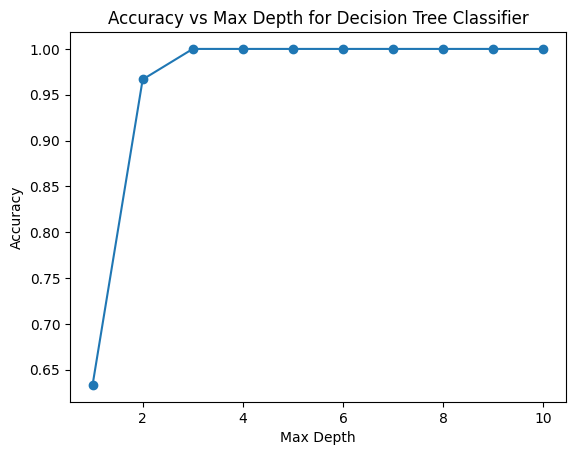

In [ ]:
import matplotlib.pyplot as plt

max_depth = []
accuracy_list = []

for i in range(1, 11):
  clf = DecisionTreeClassifier(max_depth=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  max_depth.append(i)
  accuracy_list.append(accuracy)

plt.plot(max_depth, accuracy_list, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree Classifier')
plt.show()

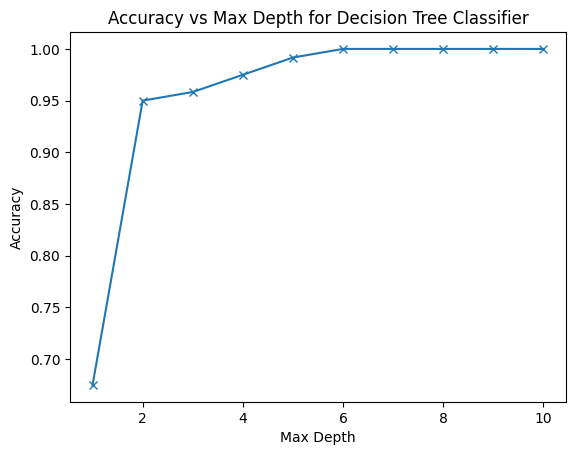

In [ ]:
import matplotlib.pyplot as plt

max_depth = []
accuracy_list = []

for i in range(1, 11):
  clf = DecisionTreeClassifier(max_depth=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  max_depth.append(i)
  accuracy_list.append(accuracy)

plt.plot(max_depth, accuracy_list, marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree Classifier')
plt.show()

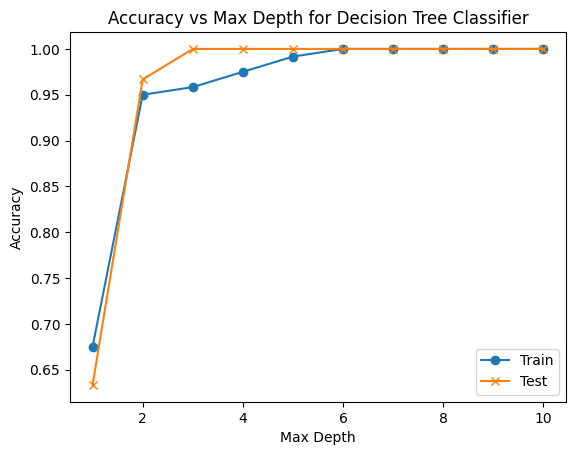

In [ ]:
import matplotlib.pyplot as plt

max_depth = []
accuracy_list_train = []
accuracy_list_test = []

for i in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    max_depth.append(i)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.plot(max_depth, accuracy_list_train, marker='o', label='Train')
plt.plot(max_depth, accuracy_list_test, marker='x', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree Classifier')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
files.upload()

titanic_df = pd.read_csv('titanic.csv', )
titanic_df


Saving titanic.csv to titanic (3).csv


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
X=titanic_df.drop('Survived', axis=1)


In [ ]:
y = titanic_df['Survived']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

encoder = OneHotEncoder(sparse=False)
X_encoder = encoder.fit_transform(X)  # fit and transform the input data

X_train, X_test, y_train, y_test = train_test_split(X_encoder, y, random_state=42, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.793


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
def gini_impurity(Data: np.array) -> float:
    """ Function to compute the Gini Impurity """
    #initialize the output
    G = 0
    #iterate through the unique classes
    for c in np.unique(Data[:,-1]):
        #compute p for the current c
        p = Data[Data[:,-1]==c].shape[0]/Data.shape[0]
        #compute term for the current c
        G += p*(1-p)
    #return gini impurity
    return(G)

In [ ]:
X,y = make_classification(n_samples=100,
                          n_features=5,
                          n_informative=2,
                          n_classes=2,
                          weights=[0.4,0.6],
                          random_state=42)

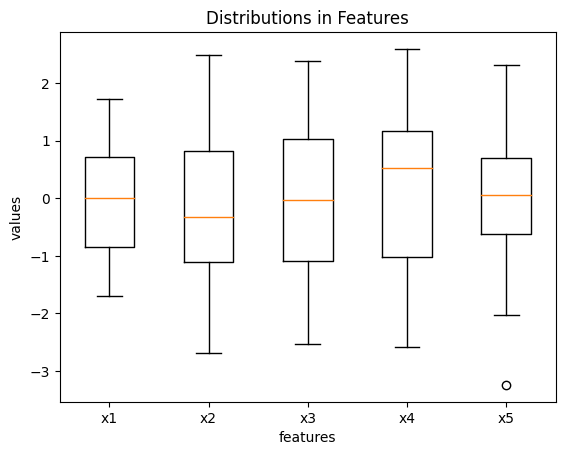

In [ ]:
plt.boxplot(X)
plt.xlabel('features')
plt.ylabel('values')
plt.title('Distributions in Features')
plt.xticks([1, 2, 3, 4, 5], ['x1', 'x2', 'x3', 'x4', 'x5'])
plt.show()

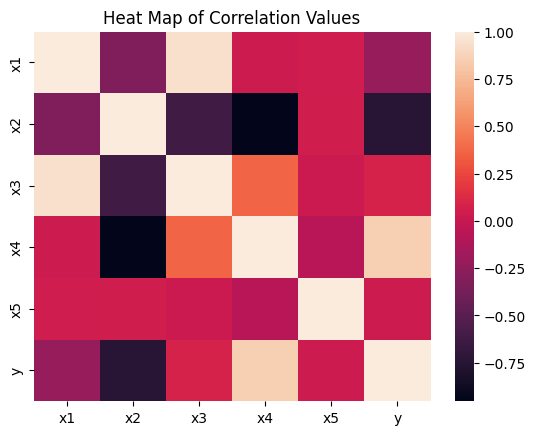

In [ ]:
names   = ["x1","x2","x3","x4","x5"]
df      = pd.DataFrame(X,columns=names)
df["y"] = y
dfCor   = df.corr()
sn.heatmap(dfCor)
plt.title('Heat Map of Correlation Values')
plt.show()

In [ ]:
df1 = df.sample(frac=0.4, random_state=42)
df2 = pd.merge(df,df1,indicator=True,how='outer').query('_merge=="left_only"') \
                                                 .drop('_merge', axis=1)

In [ ]:
gini_impurity(df1.values)

0.45499999999999996

In [ ]:
gini_impurity(df2.values)

0.4911111111111111

In [ ]:
# weighted average to measure net 'quality' of the split
0.4*gini_impurity(df1.values) + 0.6*gini_impurity(df2.values)

0.4766666666666666

#GINI

In [ ]:
digit = datasets.load_iris()
X, y = digit.data, digit.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
clf=DecisionTreeClassifier(criterion='gini')

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy: %.3f' % accuracy)

Accuracy: 1.000


# Titanic data set for three model comparsion Logistic Regression, Random Forest, and Support Vector Machine

# Importing the necessary library

In [ ]:
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



files.upload()

!ls

Saving titanic.csv to titanic.csv
drive  sample_data  titanic.csv


# Dataloading and data uploading

In [ ]:

data = pd.read_csv('titanic.csv')
data


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Data  loading

In [ ]:


# Load the Titanic dataset
# The fillna() method replaces the NULL values with a specified value
# Data preprocessing
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)



In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)



In [ ]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)



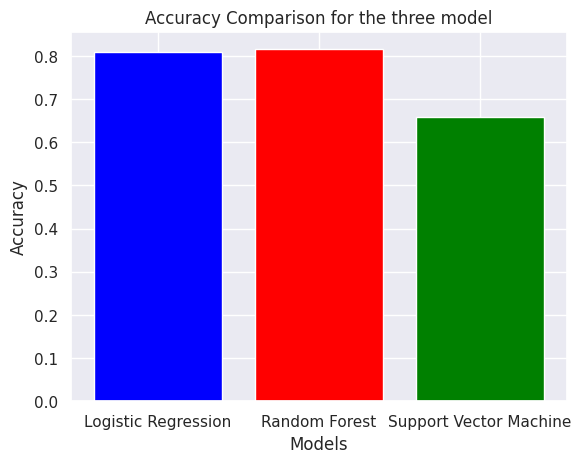

In [ ]:
# Plotting accuracy graph
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracy = [log_reg_acc, rf_acc, svc_acc]
colors = ["blue", "red", "green"]

plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for the three model')

plt.show()


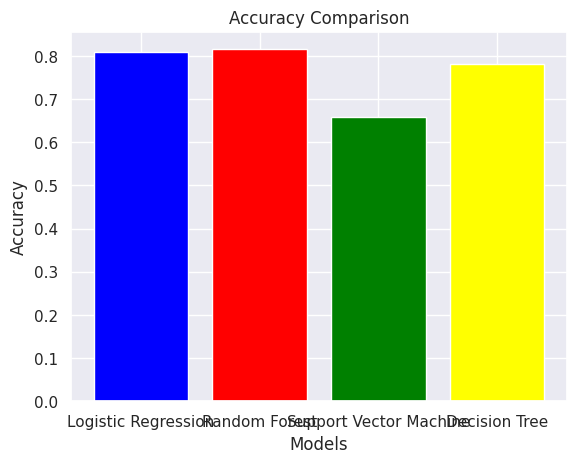

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Plotting accuracy graph
# Plotting accuracy graph
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree']
accuracy = [log_reg_acc, rf_acc, svc_acc, dt_acc]
colors = ["blue", "red", "green", "yellow"]
plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


In [ ]:
print(accuracy)

[0.8100558659217877, 0.8156424581005587, 0.659217877094972, 0.7821229050279329]


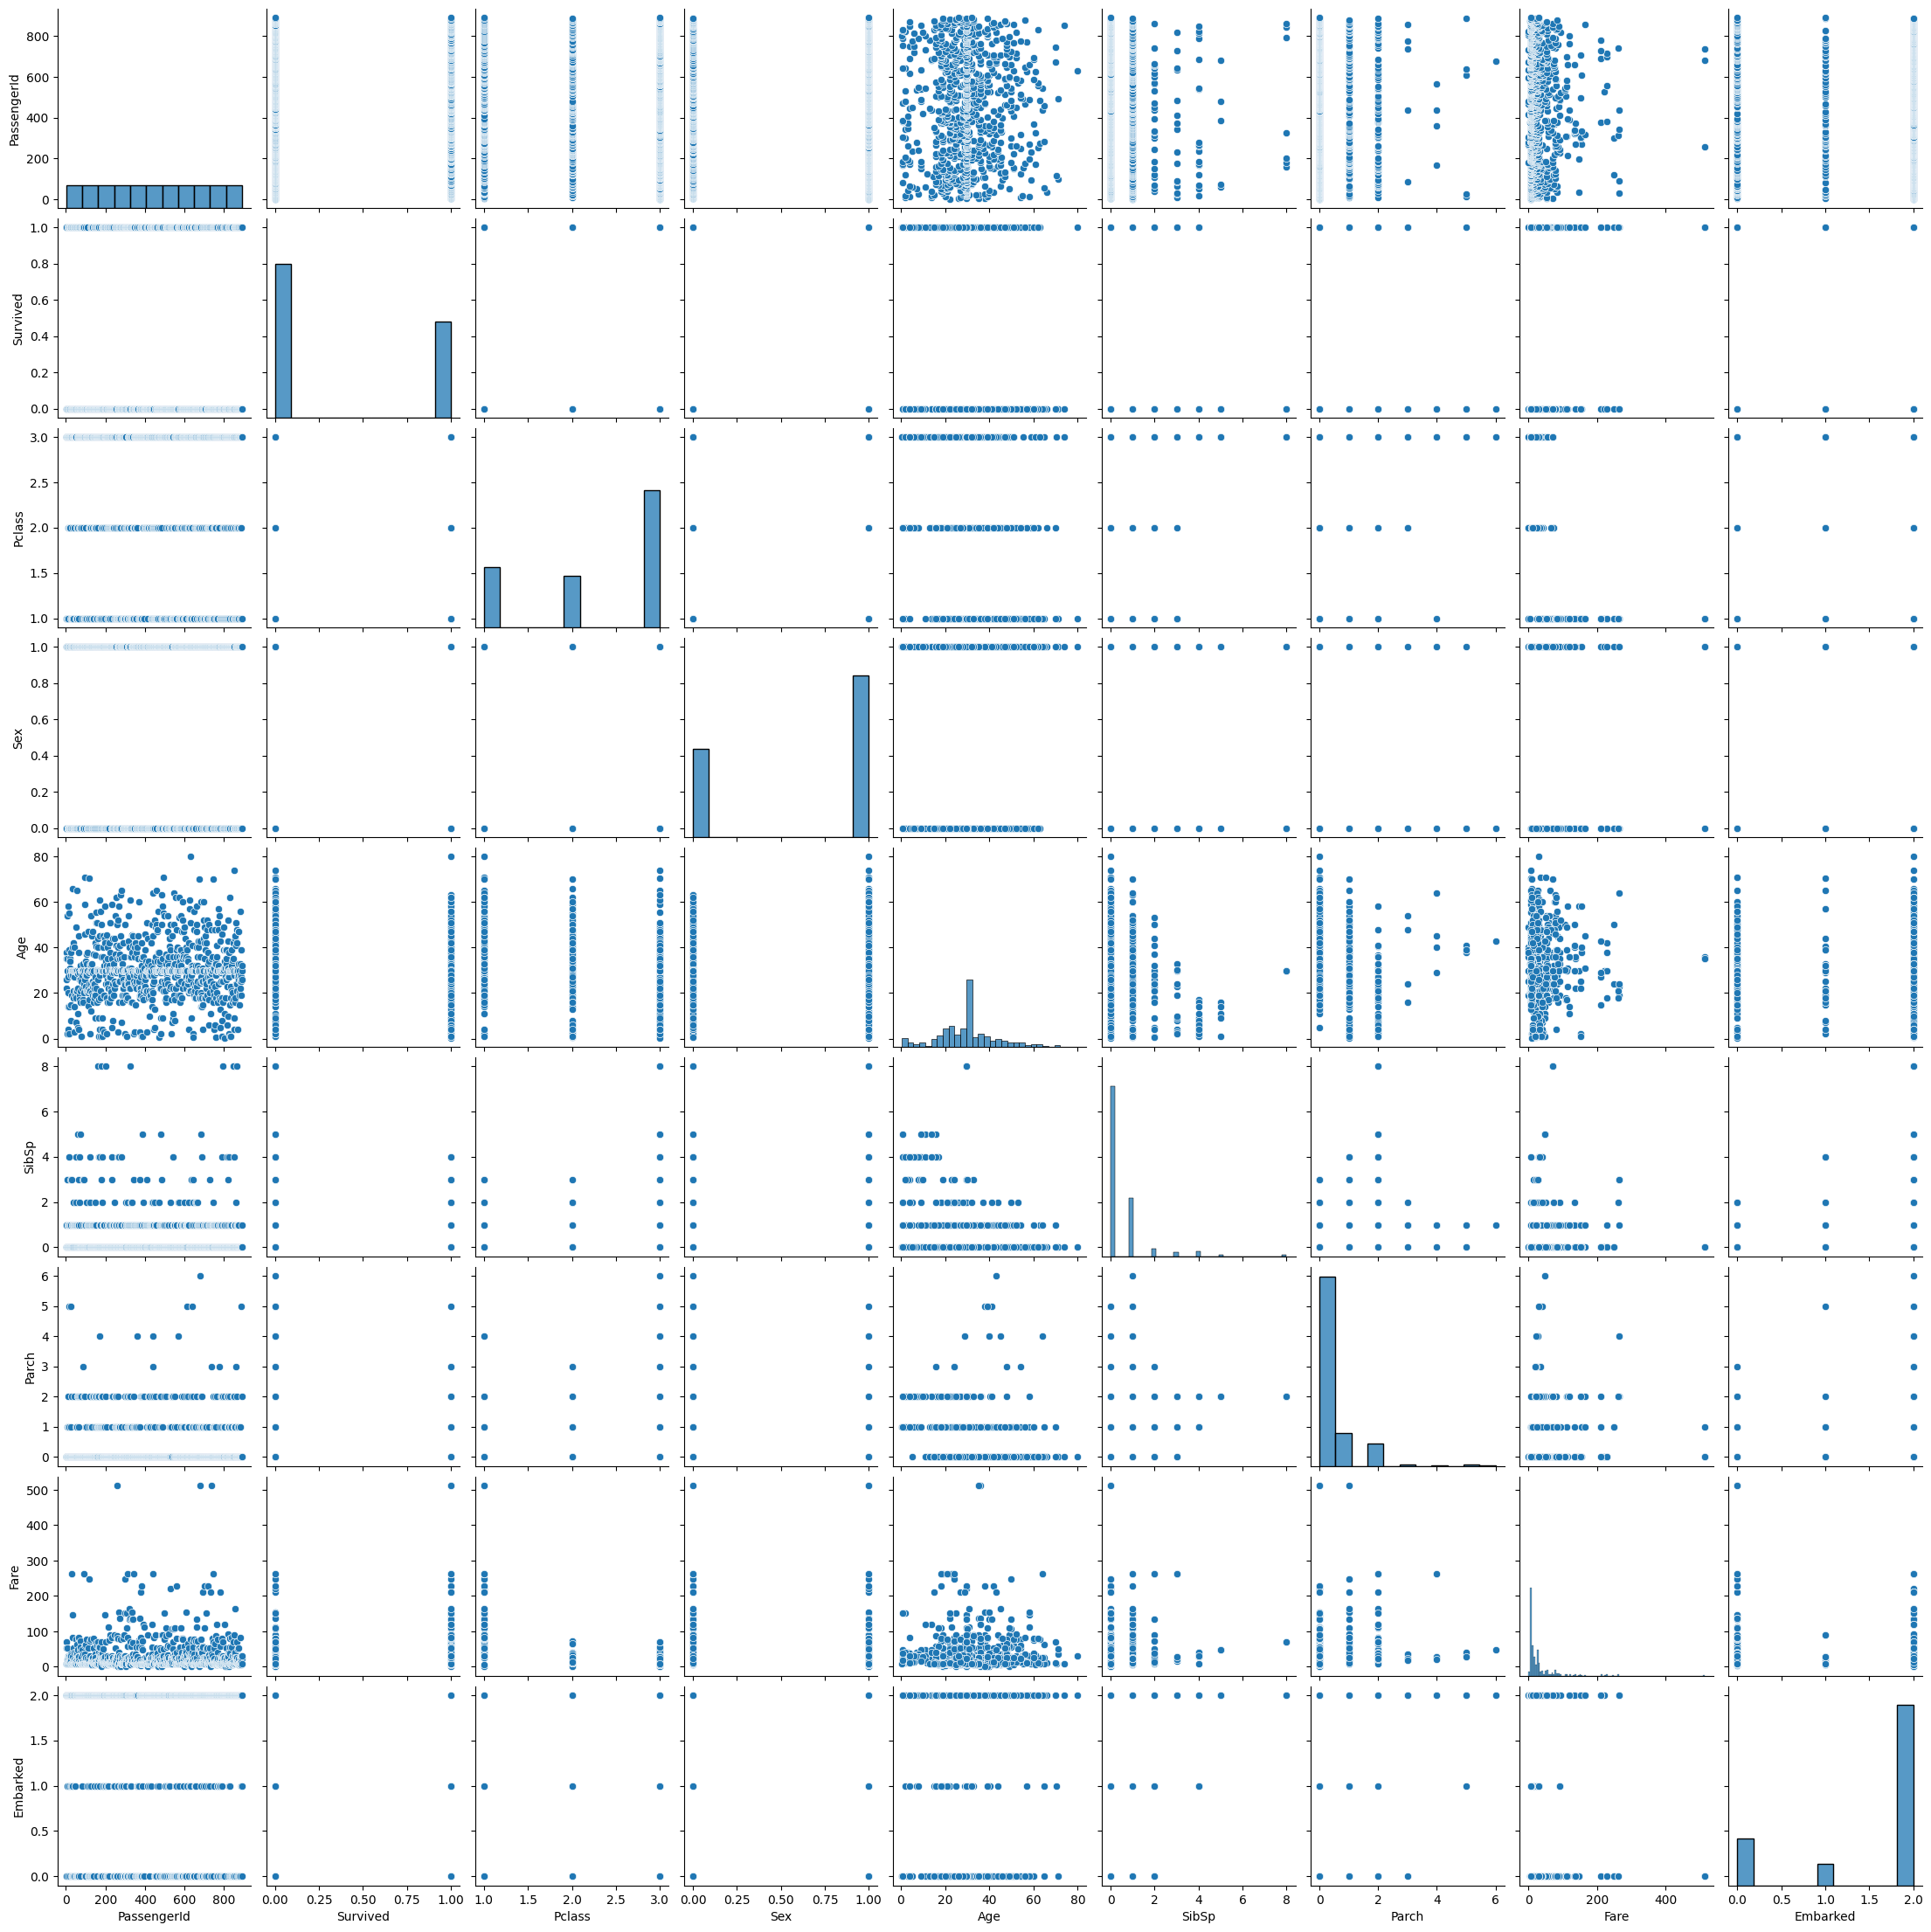

In [ ]:
import seaborn as sns
sns.pairplot(data)

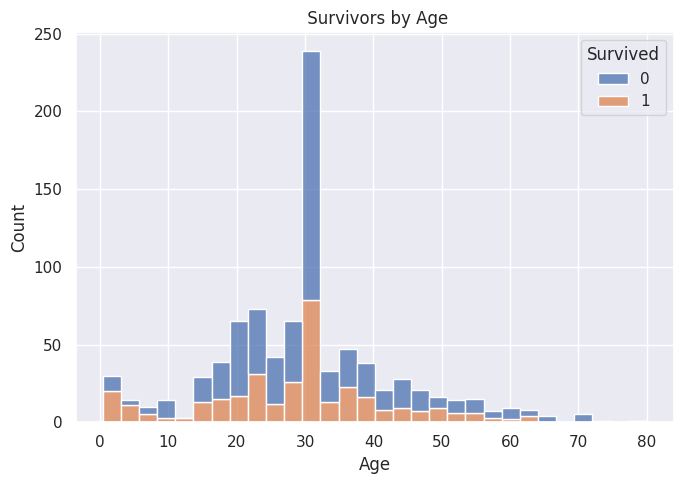

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(x=data['Age'], hue=data['Survived'], multiple='stack', palette='deep')
plt.title(" Survivors by Age")
plt.tight_layout()
plt.show()

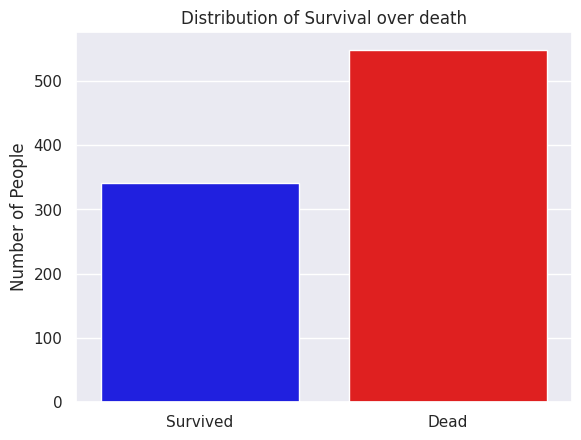

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

values = [len(data.loc[data["Survived"]==1]),len(data.loc[data["Survived"]==0])]
labels = ["Survived","Dead"]
plt.title("Distribution of Survival over death")
plt.ylabel("Number of People")

colors = ["blue", "red"]
sns.barplot(x=labels, y=values, palette=colors)

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(accuracy)

[0.8100558659217877, 0.8212290502793296, 0.659217877094972, 0.7877094972067039]


In [ ]:

# Load the Titanic dataset

# Preprocess the dataset - remove any rows with missing values
titanic_df = data.dropna()

# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset

# Preprocess the dataset - remove any rows with missing values

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])



# Encode categorical variables

# Split data into features and labels
y_age = titanic_df['Age']
y_sex = titanic_df['Sex_male']

# Split data into train and test sets

X = data[['Pclass', 'Sex', 'Survived', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Age']


KeyError: ignored

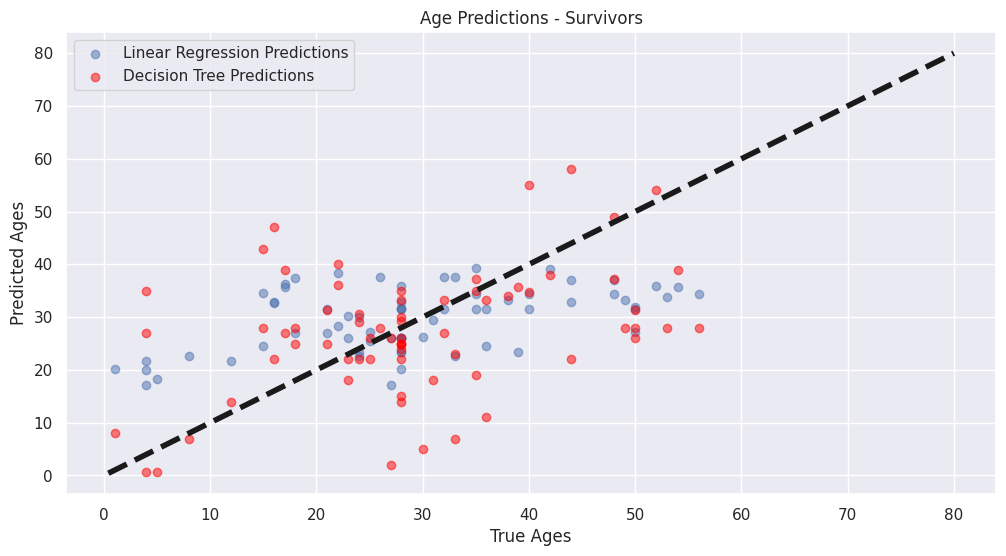

Survivors - Linear Regression - MSE: 129.18611405124483
Survivors - Decision Tree - MSE: 191.83018811392913
Survivors - Linear Regression - R^2: 0.24877666726354863
Survivors - Decision Tree - R^2: -0.11550157145560203


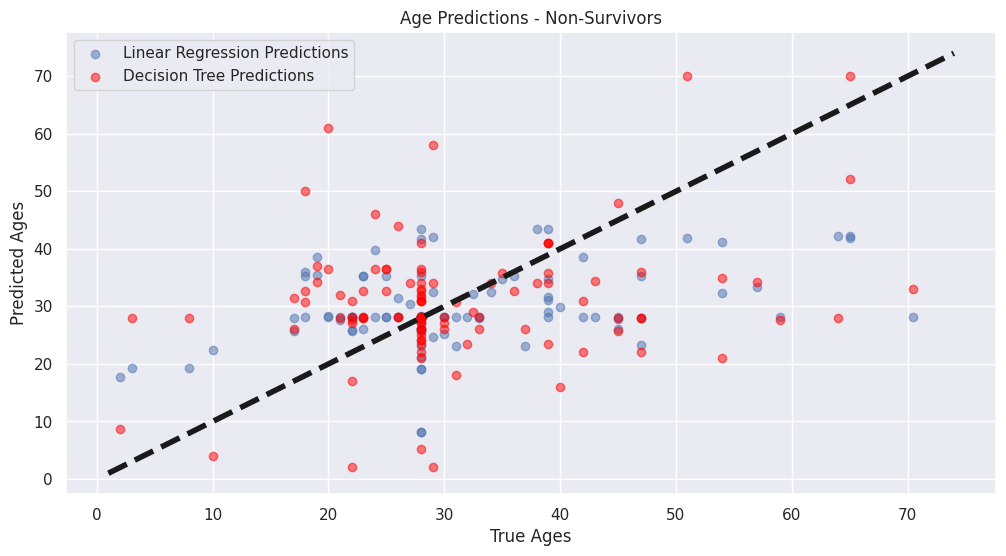

Non-Survivors - Linear Regression - MSE: 128.50211824030927
Non-Survivors - Decision Tree - MSE: 187.34581588632636
Non-Survivors - Linear Regression - R^2: 0.11999047436152199
Non-Survivors - Decision Tree - R^2: -0.28298354008582827


In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Titanic dataset
data = pd.read_csv('titanic.csv')

# Handling missing values
# For simplicity, we will fill missing ages with the median age
data['Age'] = data['Age'].fillna(data['Age'].median())

# Split data into survivors and non-survivors
survivors = data[data['Survived'] == 1]
non_survivors = data[data['Survived'] == 0]

# Define a function to create models for survivors and non-survivors
def create_model_and_plot(df, title):
    # Using Pclass, Sex, SibSp, Parch, and Fare to predict Age
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
    features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male']
    X = df[features]
    y = df['Age']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)




    # Create and train the Decision Tree model
    tree_reg = DecisionTreeRegressor(random_state=42)
    tree_reg.fit(X_train, y_train)

    # Predictions
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_tree = tree_reg.predict(X_test)


    # Plot true vs predicted ages
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred_lin, alpha=0.5, label='Linear Regression Predictions')
    plt.scatter(y_test, y_pred_tree, alpha=0.5, label='Decision Tree Predictions', color='red')
    plt.legend()
    plt.xlabel('True Ages')
    plt.ylabel('Predicted Ages')
    plt.title(f'Age Predictions - {title}')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.show()

    # Print performance metrics
    print(f'{title} - Linear Regression - MSE:', mean_squared_error(y_test, y_pred_lin))
    print(f'{title} - Decision Tree - MSE:', mean_squared_error(y_test, y_pred_tree))
    print(f'{title} - Linear Regression - R^2:', r2_score(y_test, y_pred_lin))
    print(f'{title} - Decision Tree - R^2:', r2_score(y_test, y_pred_tree))

# Run the function for survivors and non-survivors
create_model_and_plot(survivors, 'Survivors')
create_model_and_plot(non_survivors, 'Non-Survivors')


# Home Work 1 AND 2 for Gender and Age

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Selecting features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  'Survived']
target = 'Sex'

# Preprocessing data
titanic['Embarked'].fillna('S', inplace=True)
embarked_dummies = pd.get_dummies(titanic['Embarked'])
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

# Split the data
X = titanic[features]
y = titanic[target].map({'male': 0, 'female': 1})

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression accuracy: {accuracy_logistic}')

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier accuracy: {accuracy_rf}')

# Support Vector Classification
svc_model = SVC(kernel='linear')  # you can also try with 'rbf' or other kernels
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Support Vector Classifier accuracy: {accuracy_svc}')

Logistic Regression accuracy: 0.7821229050279329
Random Forest Classifier accuracy: 0.8044692737430168
Support Vector Classifier accuracy: 0.7821229050279329


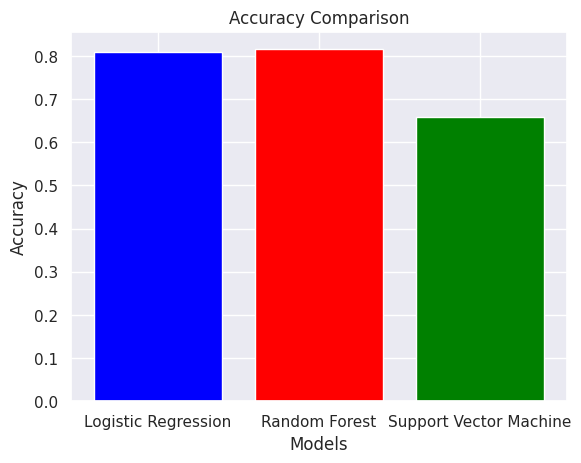

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracy = [log_reg_acc, rf_acc, svc_acc]
colors = ["blue", "red", "green"]
plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Selecting features and target variable
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
target = 'Age'

# Preprocessing data
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(titanic['Embarked'], dummy_na=True)
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

# Split the data
X = titanic[features]
y = titanic[target]

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

# Support Vector Regression
svr_model = SVR(kernel='linear')  # you can also try with 'rbf' or other kernels
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Support Vector Regression MSE: {mse_svr}')


Linear Regression MSE: 138.85803278939275
Random Forest MSE: 135.81883515392224
Support Vector Regression MSE: 143.69284810723966


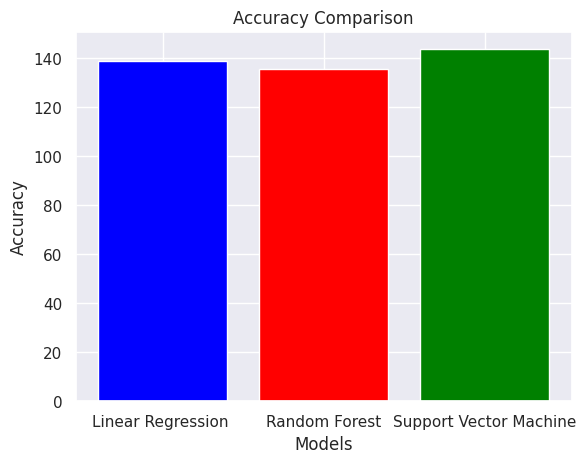

In [ ]:
models = ['Linear Regression ', 'Random Forest', 'Support Vector Machine']
accuracy = [mse_linear, mse_rf, mse_svr]
colors = ["blue", "red", "green"]
plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()
